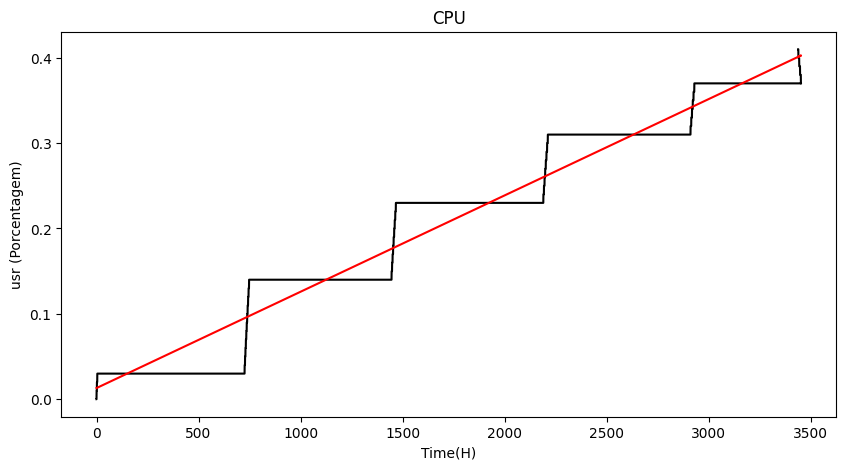

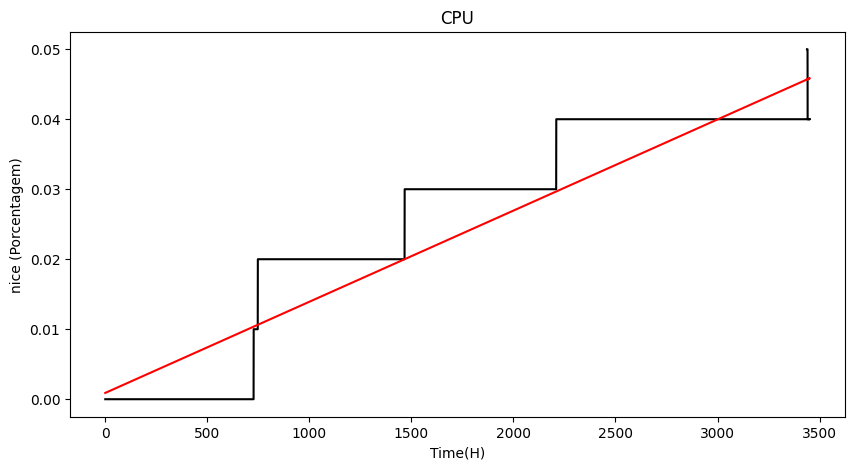

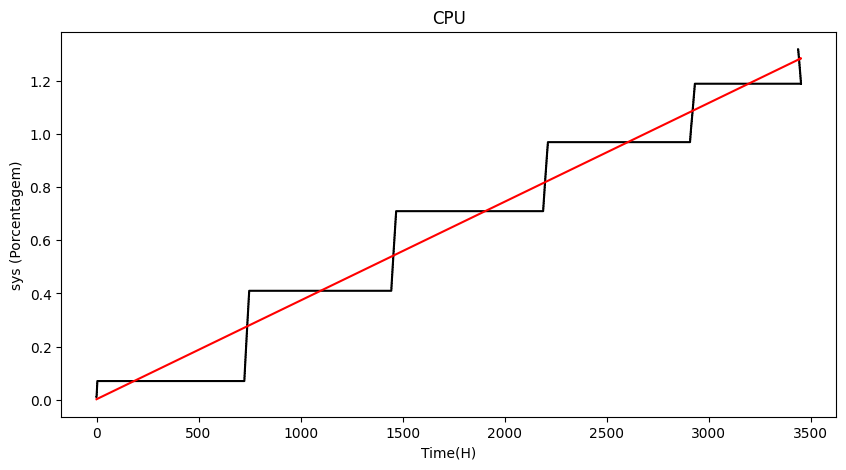

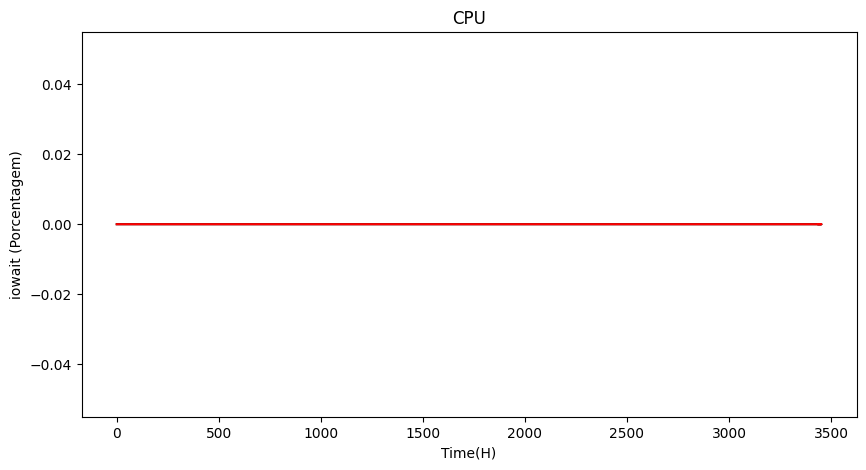

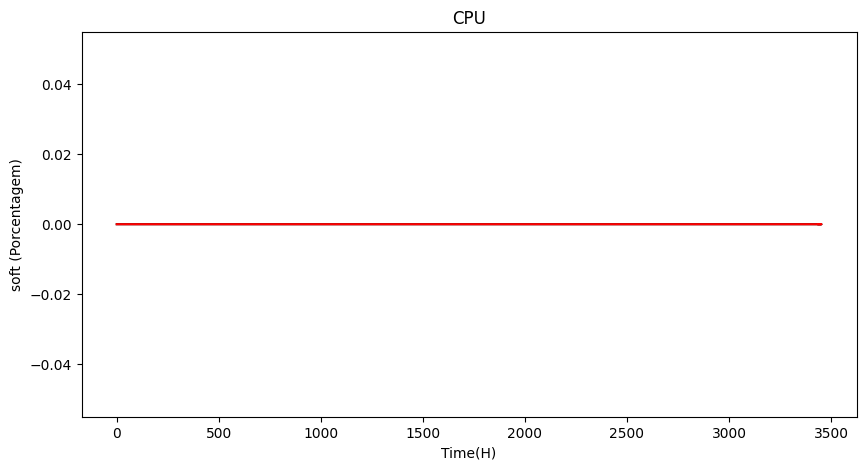

OverflowError: int too big to convert

<Figure size 1000x500 with 1 Axes>

In [15]:
# , parse_dates=['date_time']).rename(columns={'date_time': 'seconds'}
# vbox_VBoxXPCOMIPCD = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/logs/vbox_monitoring-VBoxXPCOMIPCD.csv', sep=';', decimal=',', dayfirst=False)
# vbox_monitoring_VBoxHeadless = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/logs/vbox_monitoring-VBoxHeadless.csv', parse_dates=['date_time']).rename(columns={'date_time': 'seconds'}, sep=';', decimal=',', dayfirst=False)

# response_times = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/logs/response_times.csv', parse_dates=['date_time']).rename(columns={'date_time': 'seconds'}, sep=';', decimal=',', dayfirst=False)
# reset_times = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/logs/reset_times.csv', parse_dates=['date_time']).rename(columns={'date_time': 'seconds'}, sep=';', decimal=',', dayfirst=False)

# machine_monitoring_zombies = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/logs/machine_monitoring-zombies.csv', parse_dates=['date_time']).rename(columns={'date_time': 'seconds'}, sep=';', decimal=',', dayfirst=False)
# machine_monitoring_mem = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/logs/machine_monitoring-mem.csv', parse_dates=['date_time']).rename(columns={'date_time': 'seconds'}, sep=';', decimal=',', dayfirst=False)
# machine_monitoring_disk = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/logs/machine_monitoring-disk.csv', parse_dates=['date_time']).rename(columns={'date_time': 'seconds'}, sep=';', decimal=',', dayfirst=False)
# machineHost_server_status = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/logs/machineHost_server_status.csv', parse_dates=['date_time']).rename(columns={'date_time': 'seconds'}, sep=';', decimal=',', dayfirst=False)

try:
    import matplotlib.pyplot as plt
    import pandas as pd
    import scipy.stats as stats
    import csv
    from sklearn.linear_model import LinearRegression
    from time import sleep

except ImportError as e:
    print(f'Erro de importação: {e}')
    exit(1)

coluna_numerica = ['usr', 'nice', 'sys', 'iowait', 'soft']

machine_monitoring_cpu = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/logs/machine_monitoring-cpu.csv', sep=";", parse_dates=['date_time'], dtype={col: 'float64' for col in coluna_numerica}, decimal=",").replace(',', '.')

machine_monitoring_cpu = machine_monitoring_cpu.set_index(machine_monitoring_cpu['date_time'])

machine_monitoring_cpu['tempo_passado'] = pd.to_numeric(abs((machine_monitoring_cpu.index - machine_monitoring_cpu.index[0]).total_seconds() / 3600.0), errors='ignore')

machine_monitoring_cpu = machine_monitoring_cpu.set_index('tempo_passado')

# Selecionar apenas as colunas numéricas para dividir
numeric_cols = machine_monitoring_cpu.select_dtypes(include='number').columns

# Divisão das colunas numéricas
machine_monitoring_cpu[numeric_cols] = machine_monitoring_cpu[numeric_cols].div(1)

incluirColunaY = True
tipoYlabel = '(Porcentagem)'
title = 'CPU'

for col in machine_monitoring_cpu.columns:
  if type(tipoYlabel) is str and incluirColunaY is True:
    parte_coluna_df = f"{col} {tipoYlabel}"

  else:
    parte_coluna_df = f"{tipoYlabel}"

  machine_monitoring_cpu[col] = machine_monitoring_cpu[col].fillna(0)

  x = machine_monitoring_cpu.index.to_numpy().reshape((-1, 1)).astype(float)
  y = machine_monitoring_cpu[col].to_numpy().reshape((-1, 1))

  model = LinearRegression()
  model.fit(x, y)

  Y_pred = model.predict(x)

  if type(tipoYlabel) is str:
    ylabel = parte_coluna_df

  elif type(tipoYlabel) is dict and col in tipoYlabel:
    ylabel = ylabel[col]

  else:
    ylabel = col


  if type(title) is str:
    title = title

  elif type(title) is dict and col in title:
    title = title[col]

  else:
    title = col


  ax = machine_monitoring_cpu.plot(
      title=title,
      figsize=(10, 5),
      legend=0,
      y=col,
      xlabel='Time(H)',
      ylabel=ylabel,
      style='k'
  )

  # Adicionar a linha da regressão
  ax.plot(x, Y_pred, color='red')
  plt.show()
